In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import math

In [2]:
class Problem:
    ### to solve a problem using Evolutionary Algorithms, me must define four methods
    
    def random_solution(self):
        # this method returns a random solution for a given problem
        # ...we need it to create the initial population!
        return []
    
    def evaluate(self, s):
        # this method returns the quality of a given solution s
        # ...we need it to decide which solutions should participate in creating the new population!
        return 0.0
    
    def mutate(self, s):
        # this method returns a slightly modified solution s
        # ...this is one of the evolutionary operators!
        return s[:]
    
    def crossover(self, s1, s2):
        # this method returns a solution that is a combination of its parent solutions - s1 and s2
        # ...this is one of the evolutionary operators!
        return s1[:]
    
    ### additionally, we should define a method that will give us a preview of any given solution s
    def display_solution_param(self, s):
        print(s)

In [3]:
class TSP(Problem):
    cities = 0
    distances = []
    locations = []
    
    def __init__(self, cities, city_coords=None, seed=4432):
        # we draw random locations for the cities and we prepare a matrix of distances between them - it will come useful later!
        
        random.seed(seed)
        self.cities = cities
        
        self.locations = []
        if city_coords is None:
            for i in range(cities):
                self.locations.append((random.random(), random.random()))
        else:
            for i in range(cities):
                self.locations.append(city_coords[i])
        
        self.distances = []
        for i in range(cities):
            self.distances.append([])
            for j in range(cities):
                self.distances[i].append(self.distance(i, j))
                
    def distance(self, c1, c2):
        # euclidean distance between two points on a map
        
        loc1, loc2 = self.locations[c1], self.locations[c2]
        return math.sqrt((loc1[0]-loc2[0])**2 + (loc1[1]-loc2[1])**2)
    
    def random_solution(self):
        # we return a random permutation of numbers, which corresponds to a random order of visiting cities
        
        s = [i for i in range(self.cities)]
        random.shuffle(s)
        return s
    
    def evaluate(self, s):
        # length of the route is equal to the sum of distances between all subsequent cities
        # notice that we include the distance between the first and the last city as well! the route is a loop!
        
        fit = 0
        for i in range(len(s)):
            fit += self.distances[s[i]][s[i+1 if i+1<len(s) else 0]]
        return fit
    
    def mutate(self, s):
        # to mutate a solution, we reverse a random subsequence of the solution
        # the route is a loop, so we need to handle the subsequences that cross the end of the array in a special way!

        sol = s[:]
        c1, c2 = random.sample(range(0, self.cities), 2)
#         print(c1, c2)
        if c1 < c2:
            rev = sol[c1:c2+1]
            rev.reverse()
            sol[c1:c2+1] = rev
        else:
            rev = sol[c1:] + sol[:c2+1]
            rev.reverse()
            sol[:(c2+1)] = rev[-(c2+1):]
            sol[c1:] = rev[:-(c2+1)]
        return sol
    
    def crossover(self, s1, s2):
        # to combine two different routes, we use OX (order crossover)
        
        sol1, sol2 = s1[:], s2[:]
        c1, c2 = random.sample(range(0, self.cities), 2)
        if c2 < c1:
            ctmp = c1
            c1 = c2
            c2 = ctmp
        sol1[c1:c2+1] = list(filter(lambda x: x in sol1[c1:c2+1], s2))
        sol2[c1:c2+1] = list(filter(lambda x: x in sol2[c1:c2+1], s1))
        
        return sol1, sol2
    
    def display_solution(self, solution):
        fig, ax = plt.subplots(figsize=(8, 8))

        x = [i[1] for i in [self.locations[c] for c in solution]]
        y = [i[0] for i in [self.locations[c] for c in solution]]
        x.append(x[0])
        y.append(y[0])
        line, = ax.plot(x, y, 'go-',linewidth=2)
            
        plt.xlim((-0.03,1.03))
        plt.ylim((-0.03,1.03))
        plt.show()

In [4]:
class TSP_Poland(TSP):

    def dist(self, x1, y1, x2, y2):
        return ((x1-x2)**2+(y1-y2)**2)**(1/2)

    def __init__(self, seed=1):
        city_names = ["Poznan", "Wroclaw", "Krakow", "Warszawa", "Gdansk", "Katowice", "Lodz",
                       "Bialystok", "Rzeszow", "Szczecin", "Lublin", "Olsztyn", "Kielce", "Gdynia", "Bydgoszcz", "Zakopane"]
        city_coords = {
            "Poznan": (52.409538, 16.931992),
            "Wroclaw": (51.107883, 17.038538),
            "Krakow": (50.049683, 19.944544),
            "Warszawa": (52.237049, 21.017532),
            "Gdansk": (54.372158, 18.638306),
            "Katowice": (50.270908, 19.039993),
            "Lodz": (51.759445, 19.457216),
            "Bialystok": (53.13333, 23.16433),
            "Rzeszow": (50.041187, 21.999121),
            "Szczecin": (53.42894, 14.55302),
            "Lublin": (51.25, 22.56667),
            "Olsztyn": (53.77995, 20.49416),
            "Kielce": (50.87033, 20.62752),
            "Gdynia": (54.51889, 18.53188),
            "Bydgoszcz": (53.1235, 18.00762),
            "Zakopane": (49.29899, 19.94885)
        }      
        super().__init__(len(city_names), [city_coords[city] for city in city_names], seed)
    
    ### DISPLAY (you don't have to read it) ###

    def force_aspect(self, ax, aspect=1):
        im = ax.get_images()
        extent =  im[0].get_extent()
        ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)
        
        
    def display_solution(self, solution):
        self.display_solution_param(solution, True, [11.328361, 27.045778], [49.0025, 54.835778])
        
    def display_solution_param(self, solution, show_map, xlim, ylim):
        fig, ax = plt.subplots(figsize=(8, 8))
        
        if show_map:
            datafile = 'polska.png'
            img = mpimg.imread(datafile)
            plt.imshow(img, zorder=0, extent=[14.245, 24.129139, 49.0025, 54.835778])

        x = [i[1] for i in [self.locations[c] for c in solution]]
        y = [i[0] for i in [self.locations[c] for c in solution]]
        x.append(x[0])
        y.append(y[0])
        line, = ax.plot(x, y, 'go-',linewidth=2)

        if show_map:
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            self.force_aspect(ax)
            
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.show()

**Task 1:** Generate a random route for the TSP_Poland problem. Display the route and three possible mutations of that route. Repeat that for a new instance of the problem. Did the routes change? Why / why not?
 
**Answer:** If we use a random seed, the routes change due to mutations that eventually lead us to the best solution, selecting better rout each time. Otherwise, there would be no changes, because the initial seed is equal to 1.

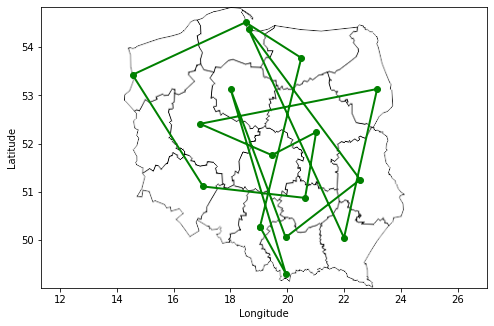

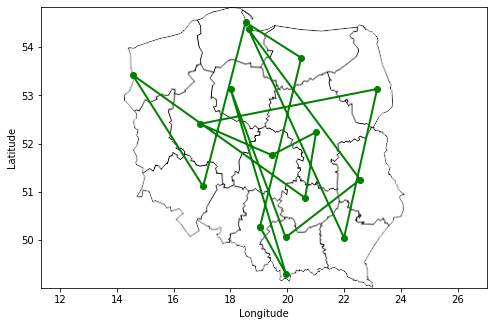

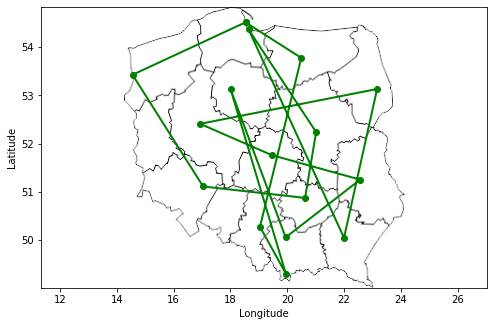

In [10]:
t = TSP_Poland(seed=random.randint(0, 1e9))
r = t.random_solution()
t.display_solution(r)
r2 = t.mutate(r)
t.display_solution(r2)
r3 = t.mutate(r)
t.display_solution(r3)

**Task 2:** Implement an algorithm searching for the best solution by generating random solutions. Write down the average fitness of the best solution after 10, 100, 1000 and 10 000 evaluations over 10 runs.

In [117]:
def fitness():
    t = TSP_Poland(seed=random.randint(0, 1e9))
    ev = [10, 100, 1000, 10000]
    l = [[] for x in range(len(ev))]
    for i in range(10):
        for j in range(len(ev)):
            sol = []
            for k in range(int(ev[j])):
                sol.append(t.evaluate(t.random_solution()))
            l[j].append(min(sol))
    for m in range(len(ev)):
        av = sum(l[m]) / len(l[m])
        print('The average fitness of the best solution after {} evaluations over 10 runs: {} '.format(ev[m], av))
fitness()

The average fitness of the best solution after 10 evaluations over 10 runs: 49.21421994436328 
The average fitness of the best solution after 100 evaluations over 10 runs: 42.92072067485388 
The average fitness of the best solution after 1000 evaluations over 10 runs: 40.26465988641217 
The average fitness of the best solution after 10000 evaluations over 10 runs: 37.88376764423793 


**Task 3:** Implement the generational evolutionary algorithm with tournament selection. Let it be parametrized with four parameters: the size of the population $N$, the size of the tournament $t$, the probability of mutation $p_m$ and the probability of crossover $p_c$. The algorithm should terminate automatically after 50 generations with no improvement.

* Assume $N=20$, $t=3$, $p_m=0.6$ and $p_c=0.2$. For the TSP_Poland problem, write down the average fitness of the best solution after 10, 100, 1000 and 10 000 evaluations over 10 runs. Does the algorithm find better solutions than random search?
* What is the difference between random search and evolution?

In [205]:
def tournament(tsp, pop, N, t, pm, pc):
    new_pop = []
    for i in range(N):
        tour = random.sample(range(0, N), t)
        fit = [tsp.evaluate(pop[x]) for x in tour]
        idx = pop[tour[fit.index(min(fit))]]
        new_pop.append(idx)
    for j in range(len(new_pop) - 1):
        if random.uniform(0,1) < pm:
            new_pop[j] = tsp.mutate(new_pop[j])
        if random.uniform(0,1) < pc:   
            new_pop[j], new_pop[j + 1] = tsp.crossover(new_pop[j], new_pop[j + 1])
    return new_pop

def check(tsp, pop, N, t, pm, pc):
    no_imp = 0
    min_res = 1000000
    while no_imp <= 50:
        pop = tournament(tsp, pop, N, t, pm, pc)
        sol = []
        for z in range(N):
            sol.append(tsp.evaluate(pop[z]))
        if min(sol) < min_res:
            min_res = min(sol)
        else:
            no_imp += 1
    return min(sol)

def fitness(N, t, pm, pc):
    tsp = TSP_Poland(seed=random.randint(0, 1e9))
    ev = [10, 100]
    l = [[] for x in range(len(ev))]
    for i in range(10):
        for j in range(len(ev)):
            sol = []
            for k in range(int(ev[j])):
                pop = [tsp.random_solution() for i in range(N)] 
                sol.append(check(tsp, pop, N, t, pm, pc))
            l[j].append(min(sol))
    for m in range(len(ev)):
        av = sum(l[m]) / len(l[m])
        print('The average fitness of the best solution after {} evaluations over 10 runs: {} '.format(ev[m], av))
fitness(20, 3, 0.6, 0.2)

The average fitness of the best solution after 10 evaluations over 10 runs: 27.46493667494746
The average fitness of the best solution after 100 evaluations over 10 runs: 26.99409818587087
The average fitness of the best solution after 1000 evaluations over 10 runs: 26.649868352095561


(The algorithm cannot reach 10000)

**Task 4:** Perform some experiments using different instance sizes for the TSP problem. How do the parameters of the algorithm influence the quality of the solutions found by the algorithm? How do they influence the total number of evaluations made before the algorithm halts? Are the optimal parameter values the same for small and big instances of the TSP problem? Why / why not?

**Answer:** The parameters affect in a way that an algorithm is more likely to be randomly contained if it were set to high values, as well as the values would be too low, the algorithm would achieve convergence. When it comes to the size of a population, if it were too small, the output would be a local optimum (not global), while if it were too large, it would take too much time to continue. The number of evaluations does not have huge impact on the result, therefore, it is not worth it. The best result we can get considering the quality of found value and time-spending on it, it is better to choose the population size equal to 100(in our case).

In [206]:
fitness(40, 5, 0.8, 0.6)

The average fitness of the best solution after 10 evaluations over 10 runs: 29.346370570662078
The average fitness of the best solution after 100 evaluations over 10 runs: 27.940631004951918 
The average fitness of the best solution after 1000 evaluations over 10 runs: 26.481497802180253 


(The algorithm cannot reach 10000)

**Task 5:**

* What is the role of a mutation operator in evolutionary algorithms?
* What are the properties of a good mutation operator?
* What is the role of a crossover operator in evolutionary algorithms?
* What are the properties of a good crossover operator?
* What does it mean for the population to converge?
* How do the parameters of the evolutionary algorithm affect the speed of its convergence?
* Does the speed of the algorithm's convergence correlate with the quality of the solutions? What is the reason?
* Can a population escape from a local optimum once it has converged?

**1)** The main role is to select the best possible solution that exists in terms of a population.

**2)** In order to preserve its initial intent, the probability of mutation occurrence should be low, otherwise the search becomes random (if the probability is set higher). 

**3)** The main purpose of crossover operator in EA is to obtain genetic information from two parents and generate a new offspring from the data from both parents.

**4)** The main property is to combine nearest solutions,that leads to non-random result.

**5)** It is a certain condition that stops an algorithm when the result stops its improvement or reaches an initial amount of iterations.

**6)** The parameters affect in a way that if it would be set on high values, it is more likely for an algorithm to become randomly contained as well as the values would be too low, the algorithm would reach convergence. When it comes to the size of a population, if it would be too small, the result would find just local optimum (not global), whereas if it would be too large, the proceed would take too much time to be accomplished, but the improve of result could not be seen making a comparison with the smaller instances.

**7)** The better quality of results tends to emerge as later convergence appears. This means that, over time, the algorithm selects a wider variety of solutions. If it would converge too fast, it would find a local optimum as a result. And, in opposite, the long convergence would lead to the global optimum(the best result).

**8)** Yes, that can happen by increasing probabilities of mutation and crossover.